# Effect Size and Statistical Power

Main author: Alison Peebles Madigan.

## Agenda today:
- Review p-value, hypothesis testing, and two types of error
- Introduction to power, power analysis, and analyze power using numpy 
- Learn the expected t value and its relationship to effect size

## Learning goals
After today, you'll be able to...
- Visualize and explain effect size in python
- Explain what power and power analysis are in context  
- Explain type I and type II error in specific context

## Part 1. Effect Size
Effect size is used to quantify the size of the difference between two groups under observation. Effect size is easy to calculate, understand and apply to any measured outcome and it's applicable to a multitude of study domains. It is highly valuable for quantifying the effectiveness of a particular intervention, relative to some comparison. Measuring effect size allows scientists to go beyond the obvious and simplistic, 'Does it work or not?' to the more sophisticated, 'How well does it work in a range of contexts?'.

### Where does gender have a larger effect?
![img](pugs_sea-lions.png)

### Knowing the effect size helps you:

- to communicate the practical significance of results. An effect might be statistically significant, but does it matter in practical scenarios?

- to perform Power Analysis, which helps determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one.

### Example

Measure effect size of gender in height

In [5]:
# calculate and visualize effect size in python 
# Import necessary modules 

import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

# seed the random number generator so we all get the same results
np.random.seed(10)

In [6]:
# Mean height and sd for males


# Generate a normal distribution for male heights



# Females


In [7]:
def evaluate_PDF(rv, sds=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval
    # (4 sd) and generate 100 samples.
    xs = np.linspace(mean - sds*std, mean + sds*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

In [64]:
# Male height
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.ylabel('probability density')
plt.legend();

### Cohen's $d$, standardized metrics for effect size

Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's $d$ is typically used to represent the magnitude of differences between two (or more) groups of a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = difference of means / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma_{pooled}}$

Note that the pooled standard deviation of two samples X and Y is NOT equivalent to the variance of the total sample X + Y.

In [9]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    

In [66]:
np.random.seed(10)
# x1 = np.random.normal(male_mean, male_sd, 1000)
# x2 = np.random.normal(female_mean, female_sd, 1000)

female_sample = female_height.rvs(1000)
male_sample = male_height.rvs(1000)

Cohen_d(female_sample, male_sample)

In [67]:
fems = list(female_sample)
fems.extend(list(male_sample))

In [68]:
(female_sample.var() + male_sample.var()) / 2 == np.asarray(fems).var()

#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/d3/cohend/)

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

In [43]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Female', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Male', color='#376cb0', alpha=0.7)
    plt.legend()
    print('overlap')

overlap


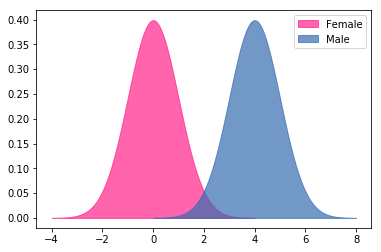

In [44]:
plot_pdfs(4)

## Part 2. Power
How does statistical power relate to the two types of error? Power is defined as the __probability of not making a Type II error__ (i.e., probability of correctly rejecting the null hypothesis when it is in fact false).

![img](conf_matrix.png)

Relevance of Power?
- Low Statistical Power: Large risk of committing Type II errors, e.g. a false negative.
- High Statistical Power: Small risk of committing Type II errors.

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

In [45]:
# import some packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.power import TTestIndPower

how does sample size affect power?

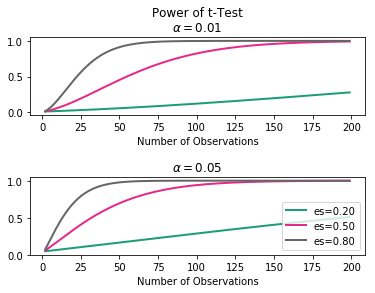

In [55]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.8)
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 


### What is the formula for calculating power?

Power is usually complex to calculate, but with the help of computers and tables, we can calculate the $\delta$, or expected t value, and find out the values for power.

Examples of power tables:
- [full power table](http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf)

How you might see one in a journal:

![imgpower](http://www.ijaweb.org/articles/2016/60/9/images/IndianJAnaesth_2016_60_9_652_190621_t1.jpg)

There are other non-parametric ways of defining effect size. However, they will not be discussed here further.